In [60]:
import os

In [61]:
base_dir = '/content/drive/My Drive/Colab Notebooks/datasets/cats_and_dogs'

In [62]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [64]:
train_datagen = ImageDataGenerator(rescale = 1. / 255)
test_datagen = ImageDataGenerator(rescale = 1. / 255)

In [65]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2010 images belonging to 2 classes.


In [66]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [67]:
from tensorflow.keras import layers, models, optimizers

In [68]:
model = models.Sequential([
  # feature extraction
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
  layers.MaxPool2D(2),

  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPool2D(2),                  

  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPool2D(2),                  

  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPool2D(2),                  

  layers.Flatten(),

  layers.Dense(512, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])

In [69]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [70]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

In [72]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50
)

Epoch 1/30
100/100 [==============================] - 1176s 12s/step - loss: 0.6893 - accuracy: 0.5427 - val_loss: 0.6698 - val_accuracy: 0.6070
Epoch 2/30
100/100 [==============================] - 11s 106ms/step - loss: 0.6616 - accuracy: 0.6040 - val_loss: 0.6464 - val_accuracy: 0.6330
Epoch 3/30
100/100 [==============================] - 11s 106ms/step - loss: 0.6193 - accuracy: 0.6698 - val_loss: 0.6203 - val_accuracy: 0.6410
Epoch 4/30
100/100 [==============================] - 11s 107ms/step - loss: 0.5827 - accuracy: 0.6975 - val_loss: 0.5882 - val_accuracy: 0.6810
Epoch 5/30
100/100 [==============================] - 11s 106ms/step - loss: 0.5416 - accuracy: 0.7281 - val_loss: 0.5764 - val_accuracy: 0.6980
Epoch 6/30
100/100 [==============================] - 11s 106ms/step - loss: 0.5163 - accuracy: 0.7337 - val_loss: 0.5712 - val_accuracy: 0.7000
Epoch 7/30
100/100 [==============================] - 11s 106ms/step - loss: 0.4958 - accuracy: 0.7643 - val_loss: 0.5526 - val_ac

In [73]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

In [74]:
import matplotlib.pyplot as plt

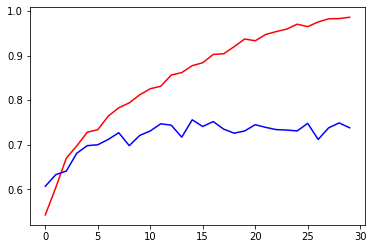

In [75]:
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')

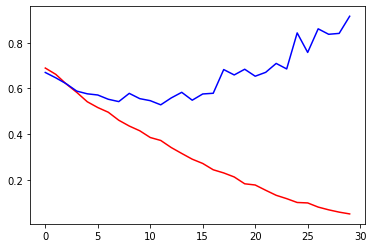

In [76]:
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')